In [8]:
from Kitsune import Kitsune
import numpy as np
import time
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.stats import norm
import os

#############################################################################
Kitsune a lightweight online network intrusion detection system based on an ensemble of autoencoders (kitNET).
For more information and citation, please see our NDSS'18 paper: Kitsune: An Ensemble of Autoencoders for Online Network Intrusion Detection

This script demonstrates Kitsune's ability to incrementally learn, and detect anomalies in recorded a pcap of the Mirai Malware.
The demo involves an m-by-n dataset with n=115 dimensions (features), and m=100,000 observations.
Each observation is a snapshot of the network's state in terms of incremental damped statistics (see the NDSS paper for more details)

The runtimes presented in the paper, are based on the C++ implimentation (roughly 100x faster than the python implimentation)
##################  Last Tested with Anaconda 3.6.3   #######################

In [9]:
'''# Load Mirai pcap (a recording of the Mirai botnet malware being activated)
# The first 70,000 observations are clean...
print("Unzipping Sample Capture...")
import zipfile
with zipfile.ZipFile("activewiretap.zip","r") as zip_ref:
    zip_ref.extractall()'''

'# Load Mirai pcap (a recording of the Mirai botnet malware being activated)\n# The first 70,000 observations are clean...\nprint("Unzipping Sample Capture...")\nimport zipfile\nwith zipfile.ZipFile("activewiretap.zip","r") as zip_ref:\n    zip_ref.extractall()'

In [10]:
# File location


In [11]:
# KitNET params:
maxAE = 10 #maximum size for any autoencoder in the ensemble layer
FMgrace = 5000 #the number of instances taken to learn the feature mapping (the ensemble's architecture)
ADgrace = 50000 #the number of instances used to train the anomaly detector (ensemble itself)

Processing file: kitsunedata\packets_20230302_000001.pcap
Parsing with tshark...
tshark parsing complete. File saved as: kitsunedata\packets_20230302_000001.pcap.tsv
counting lines in file...
There are 760943 Packets.
Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running Kitsune:
1000
2000
3000
4000
5000
The Feature-Mapper found a mapping: 100 features to 23 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
Feature-Mapper: execute-mode, Anomaly-Detector: execute-mode
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89

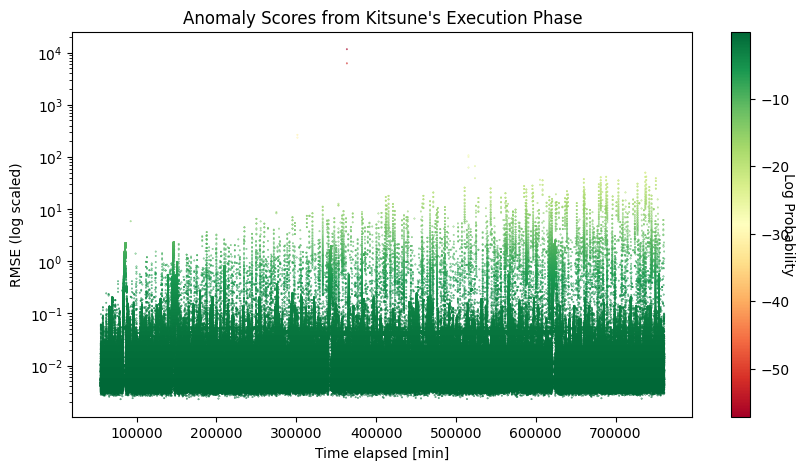

Processing file: kitsunedata\packets_20230303_000001.pcap
Parsing with tshark...
tshark parsing complete. File saved as: kitsunedata\packets_20230303_000001.pcap.tsv
counting lines in file...
There are 747428 Packets.
Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running Kitsune:
1000
2000
3000
4000
5000
The Feature-Mapper found a mapping: 100 features to 21 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
Feature-Mapper: execute-mode, Anomaly-Detector: execute-mode
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89

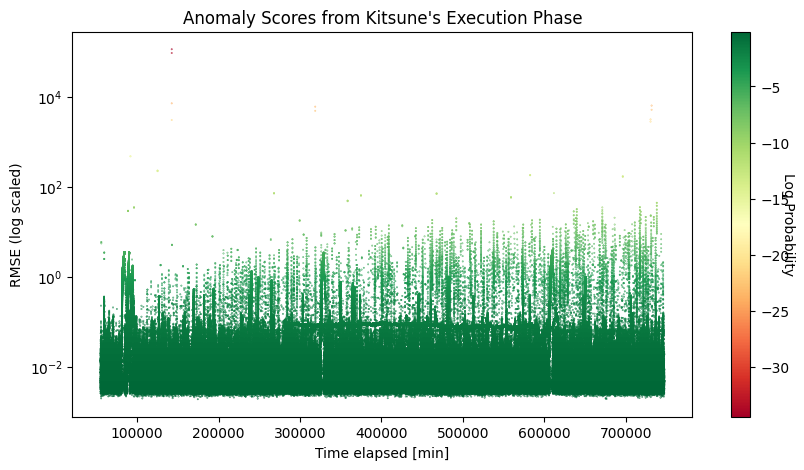

Processing file: kitsunedata\packets_20230304_000001.pcap
Parsing with tshark...
tshark parsing complete. File saved as: kitsunedata\packets_20230304_000001.pcap.tsv
counting lines in file...
There are 703092 Packets.
Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running Kitsune:
1000
2000
3000
4000
5000
The Feature-Mapper found a mapping: 100 features to 24 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
Feature-Mapper: execute-mode, Anomaly-Detector: execute-mode
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89

In [ ]:
# Build Kitsune
folder_path = "kitsunedata"
for filename in os.listdir(folder_path):
    if filename.endswith(".pcap"):
        file_path = os.path.join(folder_path, filename)
        print("Processing file:", file_path)
        path=file_path
        #path = "kitsunedata/packets_20230302_000001.pcap" #the pcap, pcapng, or tsv file to process.
        packet_limit = np.Inf #the number of packets to process
        K = Kitsune(path,packet_limit,maxAE,FMgrace,ADgrace)
        print("Running Kitsune:")
        RMSEs = []
        i = 0
        start = time.time()
        # Here we process (train/execute) each individual packet.
        # In this way, each observation is discarded after performing process() method.
        while True:
            i+=1
            if i % 1000 == 0:
                print(i)
            rmse = K.proc_next_packet()
            if rmse == -1:
                break
            RMSEs.append(rmse)
        stop = time.time()
        print("Complete. Time elapsed: "+ str(stop - start))

        benignSample = np.log(RMSEs[FMgrace+ADgrace+1:100000])
        logProbs = norm.logsf(np.log(RMSEs), np.mean(benignSample), np.std(benignSample))
        # plot the RMSE anomaly scores
        print("Plotting results")

        plt.figure(figsize=(10,5))
        fig = plt.scatter(range(FMgrace+ADgrace+1,len(RMSEs)),RMSEs[FMgrace+ADgrace+1:],s=0.1,c=logProbs[FMgrace+ADgrace+1:],cmap='RdYlGn')
        plt.yscale("log")
        plt.title("Anomaly Scores from Kitsune's Execution Phase")
        plt.ylabel("RMSE (log scaled)")
        plt.xlabel("Time elapsed [min]")
        figbar=plt.colorbar()
        figbar.ax.set_ylabel('Log Probability\n ', rotation=270)
        plt.show()